<a href="https://colab.research.google.com/github/kimdonggyu2008/SKT_FLY_AI_6/blob/main/17_nn_multi_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#뉴럴 네트워크 다중분류(흑백
)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

#데이터 정보

In [4]:
samples=np.random.randint(60000,size=25)

In [5]:
samples

array([59121, 33150,  5784, 17148, 11880,  5183, 27165, 13468, 38405,
        4778, 19075, 57572, 20304, 46912, 22858, 37841, 56418, 36531,
       43626, 30803, 47048,  3200, 38558, 18268, 34912])

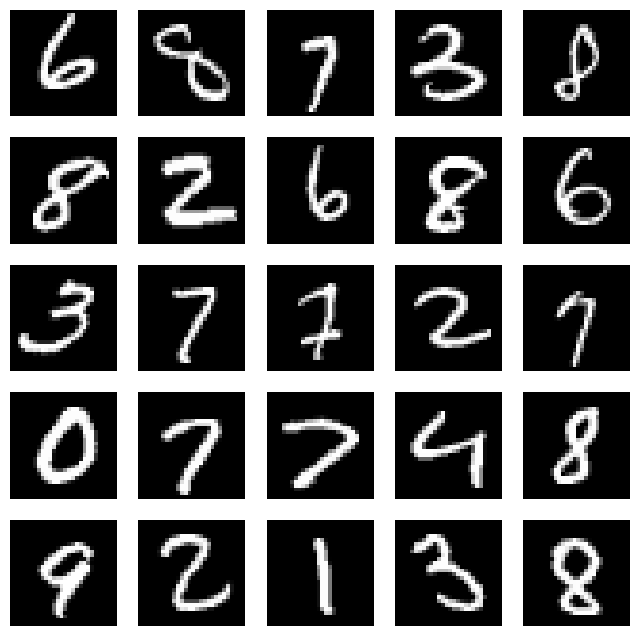

In [6]:
fig=plt.figure(figsize=(8,8))
for i,idx in enumerate(samples):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[idx],cmap='gray')
  plt.axis('off')
  plt.xlabel(y_train[idx])
plt.show()

In [7]:
np.set_printoptions(linewidth=np.inf)
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253, 205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,  90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253, 190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190, 253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35, 241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39, 148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221, 253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253, 253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253, 195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,  11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 136, 253, 253, 253, 212, 135, 132,  16,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [8]:
pd.Series(y_train).value_counts()

,count
1,6742
7,6265
3,6131
2,5958
9,5949
0,5923
6,5918
8,5851
4,5842
5,5421


#검증용 데이터

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

# 스케일링
min-max 스케일링

In [11]:
x_train_s=x_train.astype('float32')/255.

In [12]:
x_val_s=x_val.astype('float32')/255.

#원핫인코딩

In [13]:
from keras.utils import to_categorical

In [14]:
y_train_o=to_categorical(y_train)
y_val_o=to_categorical(y_val)

#모델 만들기

In [15]:
from keras import layers

In [22]:
model=keras.Sequential([
    layers.Input(shape=(28,28)),#flatten을 안하는 경우
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [17]:
x_train_s=x_train_s.reshape(-1,28,28) #flatten을 직접하는 경우
x_val_s=x_val_s.reshape(-1,28,28)

In [18]:
# model=keras.Sequential([
#     layers.Input(shape=(784,)),#flatten을 안하는 경우
#     layers.Dense(128,activation='relu'),
#     layers.Dense(64,activation='relu'),
#     layers.Dense(10,activation='softmax')
# ])
# model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
adam=keras.optimizers.Adam(learning_rate=0.003)

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [25]:
epochs=30
batch_size=64

history=model.fit(x_train_s,y_train_o,
                  epochs=epochs,
                  validation_data=(x_val_s,y_val_o),
                  batch_size=batch_size)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.8324 - loss: 0.5732 - val_acc: 0.9576 - val_loss: 0.1501
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9578 - loss: 0.1377 - val_acc: 0.9652 - val_loss: 0.1141
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9725 - loss: 0.0909 - val_acc: 0.9707 - val_loss: 0.0943
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9801 - loss: 0.0645 - val_acc: 0.9706 - val_loss: 0.0963
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9842 - loss: 0.0492 - val_acc: 0.9727 - val_loss: 0.0880
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9886 - loss: 0.0353 - val_acc: 0.9747 - val_loss: 0.0876
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9895 - loss: 0.0311 - val_acc: 0.9743 - val_loss: 0.0914
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9918 - loss: 0.0249 - val_acc: 0.9762 - val_loss: 0.0842
Epoch 9/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

In [28]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train_loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['acc'], label='train_acc')
    plt.plot(hist['epoch'], hist['val_acc'], label='val_acc')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()


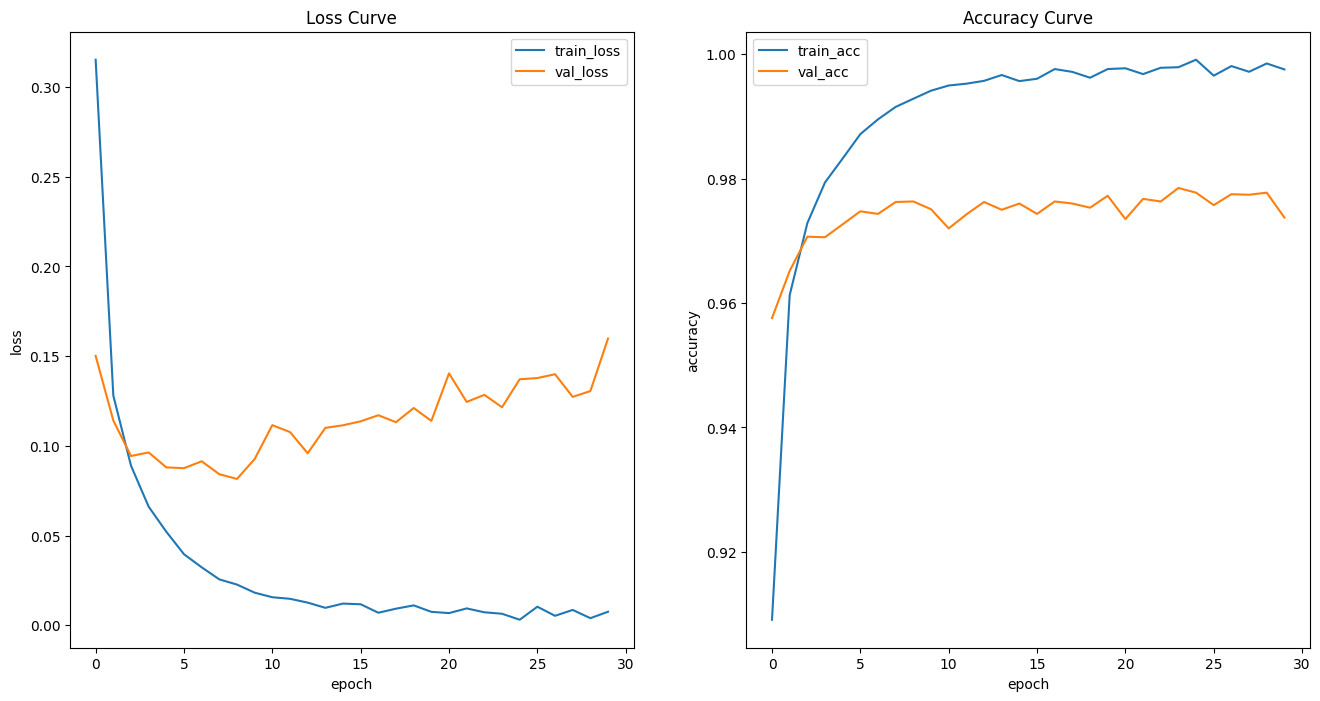

In [29]:
plot_history(history)

#테스트

In [31]:
x_test_s=x_test.astype('float32')/255.
y_test_o=to_categorical(y_test)

In [33]:
y_pred=model.predict(x_test_s)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [34]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

def print_metrics(y_true,y_pred):
  acc=accuracy_score(y_true,y_pred)
  re=recall_score(y_true,y_pred,average='macro')
  pre=precision_score(y_true,y_pred,average='macro')
  f1=f1_score(y_true,y_pred,average='macro')

  print("acc:",acc)
  print("re:",re)
  print("pre:",pre)
  print("f1:",f1)
  cfm=confusion_matrix(y_true,y_pred)
  s=sns.heatmap(cfm,annot=True,fmt='d',cbar=False,cmap='Blues')
  s.set(xlabel='Prediction',ylabel='Actual')
  plt.show()


In [36]:
y_pred

array([[2.5336378e-16, 3.6900746e-11, 7.6542453e-12, ..., 9.9999964e-01, 7.8698581e-10, 1.2547468e-08],
       [1.1791249e-14, 1.0077803e-10, 1.0000000e+00, ..., 3.1133569e-20, 2.4057107e-16, 2.0326084e-23],
       [1.5245216e-14, 9.9999964e-01, 9.5452086e-13, ..., 5.3398688e-11, 1.1599925e-07, 3.9977452e-15],
       ...,
       [1.0636556e-40, 1.7315048e-25, 3.6320028e-36, ..., 5.4019455e-24, 1.1845752e-22, 2.4297430e-14],
       [1.2985408e-24, 6.3730347e-26, 1.7197097e-24, ..., 1.3158673e-19, 3.4918930e-12, 3.6302621e-26],
       [1.3093552e-23, 6.3059056e-25, 1.6629355e-20, ..., 1.6091375e-34, 6.8351745e-28, 3.5667325e-27]], dtype=float32)

In [37]:
np.argmax(y_pred,axis=1)

array([7, 2, 1, ..., 4, 5, 6])

acc: 0.9702
re: 0.9702227830504568
pre: 0.9697438346955314
f1: 0.969776962336222


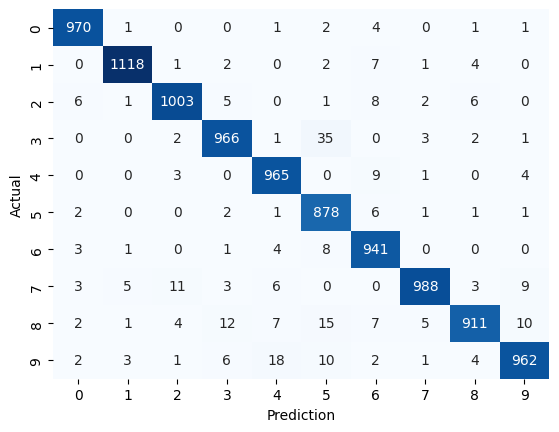

In [35]:
print_metrics(np.argmax(y_test_o,axis=1),np.argmax(y_pred,axis=1)) #최댓값만 출력